# EECS 3401 Final Project

# Author: Jamie Fletcher, Arshvir Singh, Kwonmin Bok

**Original Dataset Source: Amitansh Joshi, Amit Parolkar, &amp; Vedant Das. (2023). <i>Spotify_1Million_Tracks</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/5987852**

**Modified Dataset: 2023 Spotify song data. https://raw.githubusercontent.com/MrP29/EECS3401_Project/main/data/spotify_data_2023.csv**

# 2023 Spotify Song Dataset Description

**Attributes for spotify_data_2023.csv dataset:**  
The below attributes are copied **AS IS** from the original dataset.

1. artist_name - Name of artist

2. track_name - Name of track

3. track_id - Unique id code of track

4. popularity - Track popularity (0 to 100)

5. year - Year released (2023)

6. genre - Genre of the song

7. danceability - Track suitability for dancing (0.0 to 1.0)

8. energy - The perceptual measure of intensity and activity (0.0 to 1.0)

9. key - The key, the track is in (-1 to -11)

10. loudness - Overall loudness of track in decibels (-60 to 0 dB)

11. mode - Modality of the track (Major '1 / Minor '0')

12. speechiness - Presence of spoken words in the track

13. acousticness - Confidence measure from 0 to 1 of whether the track is acoustic

14. instrumentalness - Whether tracks contain vocals (0.0 to 1.0)

15. liveness - Presence of audience in the recording (0.0 to 1.0)

16. valence - Musical positiveness (0.0 to 1.0)

17. tempo - Tempo of the track in beats per minute (BPM)

18. duration_ms - Duration of track in milliseconds

19. time_signature - Estimated time signature (3 to 7)

# 1 - Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning
2. A regression task
3. Batch learning

### Look at the big picture
Predictions will be used to help music producers to know which type of songs are trendy and popular these days.

In [475]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Load the dataset
Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [476]:
# Load the dataset

url = "https://raw.githubusercontent.com/MrP29/EECS3401_Project/main/data/spotify_data_2023.csv"
songs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
songs_backup = songs

## 2.1 - Take a quick look at the data structure

In [477]:
songs

,index,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,584002,Jason Mraz,I Feel Like Dancing,4xYlpJPENfM4DT0rUYFqSP,67,2023,acoustic,0.812,0.706,4,-6.054,0,0.0709,0.04120,0.000000,0.107,0.621,112.002,218702,4
1,584003,Drew Holcomb & The Neighbors,Find Your People,6GuyIXoGIaTw1Pg6Ug9enJ,54,2023,acoustic,0.678,0.526,5,-7.292,1,0.0281,0.32900,0.000000,0.302,0.492,87.005,194093,4
2,584004,Wilder Woods,Get It Back,29mhNauP6A7LSLqiMOWNlv,50,2023,acoustic,0.588,0.721,8,-5.691,1,0.0409,0.24600,0.000434,0.114,0.667,161.958,204787,4
3,584005,Wilder Woods,Maestro (Tears Don't Lie),6N8hCmutQjQ3zZevRbJk36,49,2023,acoustic,0.604,0.937,7,-5.498,0,0.0452,0.00156,0.000122,0.266,0.726,120.010,202040,4
4,584006,Ben Rector,Range Rover (A Capella),1X9XILnuFHH4G7mkXSNPsn,49,2023,acoustic,0.482,0.488,2,-8.144,1,0.1040,0.85700,0.000000,0.719,0.261,140.658,182826,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38645,622647,Groove Armada,Rescue Me - Roland Leesker's You Got To Dance ...,3ZZ7FgBdEv5Eq537nTvdYH,1,2023,trip-hop,0.769,0.604,9,-13.930,1,0.0634,0.00582,0.246000,0.114,0.330,122.999,423418,4
38646,622648,Brazilian Girls,Good Time - Radio Edit,2BRpsndU96kgMjlfKjyY8q,0,2023,trip-hop,0.803,0.847,10,-5.808,0,0.0765,0.08750,0.097600,0.289,0.573,129.987,180413,4
38647,622649,Brazilian Girls,Good Time,4da5NJr6Pm72tdEzzbK5Us,1,2023,trip-hop,0.794,0.839,10,-6.373,0,0.0526,0.04980,0.106000,0.137,0.767,129.980,228600,4
38648,622650,The Future Sound Of London,Dead Skin Cells,4yKyp7I1iyYTup8xs2JVgp,0,2023,trip-hop,0.308,0.468,0,-17.676,0,0.0573,0.83600,0.684000,0.161,0.114,118.376,410529,3


In [478]:
songs.head()

,index,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,584002,Jason Mraz,I Feel Like Dancing,4xYlpJPENfM4DT0rUYFqSP,67,2023,acoustic,0.812,0.706,4,-6.054,0,0.0709,0.04120,0.000000,0.107,0.621,112.002,218702,4
1,584003,Drew Holcomb & The Neighbors,Find Your People,6GuyIXoGIaTw1Pg6Ug9enJ,54,2023,acoustic,0.678,0.526,5,-7.292,1,0.0281,0.32900,0.000000,0.302,0.492,87.005,194093,4
2,584004,Wilder Woods,Get It Back,29mhNauP6A7LSLqiMOWNlv,50,2023,acoustic,0.588,0.721,8,-5.691,1,0.0409,0.24600,0.000434,0.114,0.667,161.958,204787,4
3,584005,Wilder Woods,Maestro (Tears Don't Lie),6N8hCmutQjQ3zZevRbJk36,49,2023,acoustic,0.604,0.937,7,-5.498,0,0.0452,0.00156,0.000122,0.266,0.726,120.010,202040,4
4,584006,Ben Rector,Range Rover (A Capella),1X9XILnuFHH4G7mkXSNPsn,49,2023,acoustic,0.482,0.488,2,-8.144,1,0.1040,0.85700,0.000000,0.719,0.261,140.658,182826,4


In [479]:
songs.describe()

,index,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,38650.000000,3.865000e+04,38650.000000
mean,603333.795136,19.921759,2022.999483,0.539989,0.616256,5.281164,-9.632492,0.623726,0.088411,0.343714,0.284680,0.216473,0.424243,121.650334,2.277610e+05,3.890841
std,11261.762774,17.925338,0.101731,0.186339,0.286571,3.573919,6.610375,0.484456,0.102610,0.367293,0.381647,0.187803,0.265711,29.779188,1.242111e+05,0.464543
min,584002.000000,0.000000,2003.000000,0.055400,0.000097,0.000000,-46.995000,0.000000,0.022000,0.000000,0.000000,0.013200,0.000000,32.150000,1.528200e+04,0.000000
25%,593664.250000,2.000000,2023.000000,0.416000,0.413000,2.000000,-11.358000,0.000000,0.038200,0.008682,0.000002,0.101000,0.194000,98.977250,1.626912e+05,4.000000
50%,603326.500000,17.000000,2023.000000,0.556000,0.677000,5.000000,-7.690000,1.000000,0.051300,0.174000,0.004370,0.133000,0.394000,123.003000,2.044800e+05,4.000000
75%,612988.750000,32.000000,2023.000000,0.681000,0.865000,8.000000,-5.429000,1.000000,0.088600,0.699000,0.742000,0.282000,0.634000,139.993000,2.639800e+05,4.000000
max,904608.000000,100.000000,2023.000000,0.982000,1.000000,11.000000,2.640000,1.000000,0.960000,0.996000,0.999000,0.999000,0.999000,247.465000,3.715161e+06,5.000000


In [480]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38650 entries, 0 to 38649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             38650 non-null  int64  
 1   artist_name       38650 non-null  object 
 2   track_name        38650 non-null  object 
 3   track_id          38650 non-null  object 
 4   popularity        38650 non-null  int64  
 5   year              38650 non-null  int64  
 6   genre             38650 non-null  object 
 7   danceability      38650 non-null  float64
 8   energy            38650 non-null  float64
 9   key               38650 non-null  int64  
 10  loudness          38650 non-null  float64
 11  mode              38650 non-null  int64  
 12  speechiness       38650 non-null  float64
 13  acousticness      38650 non-null  float64
 14  instrumentalness  38650 non-null  float64
 15  liveness          38650 non-null  float64
 16  valence           38650 non-null  float6

# 3 - Explore and visualize dataset

## 3.1 Plot general histogram

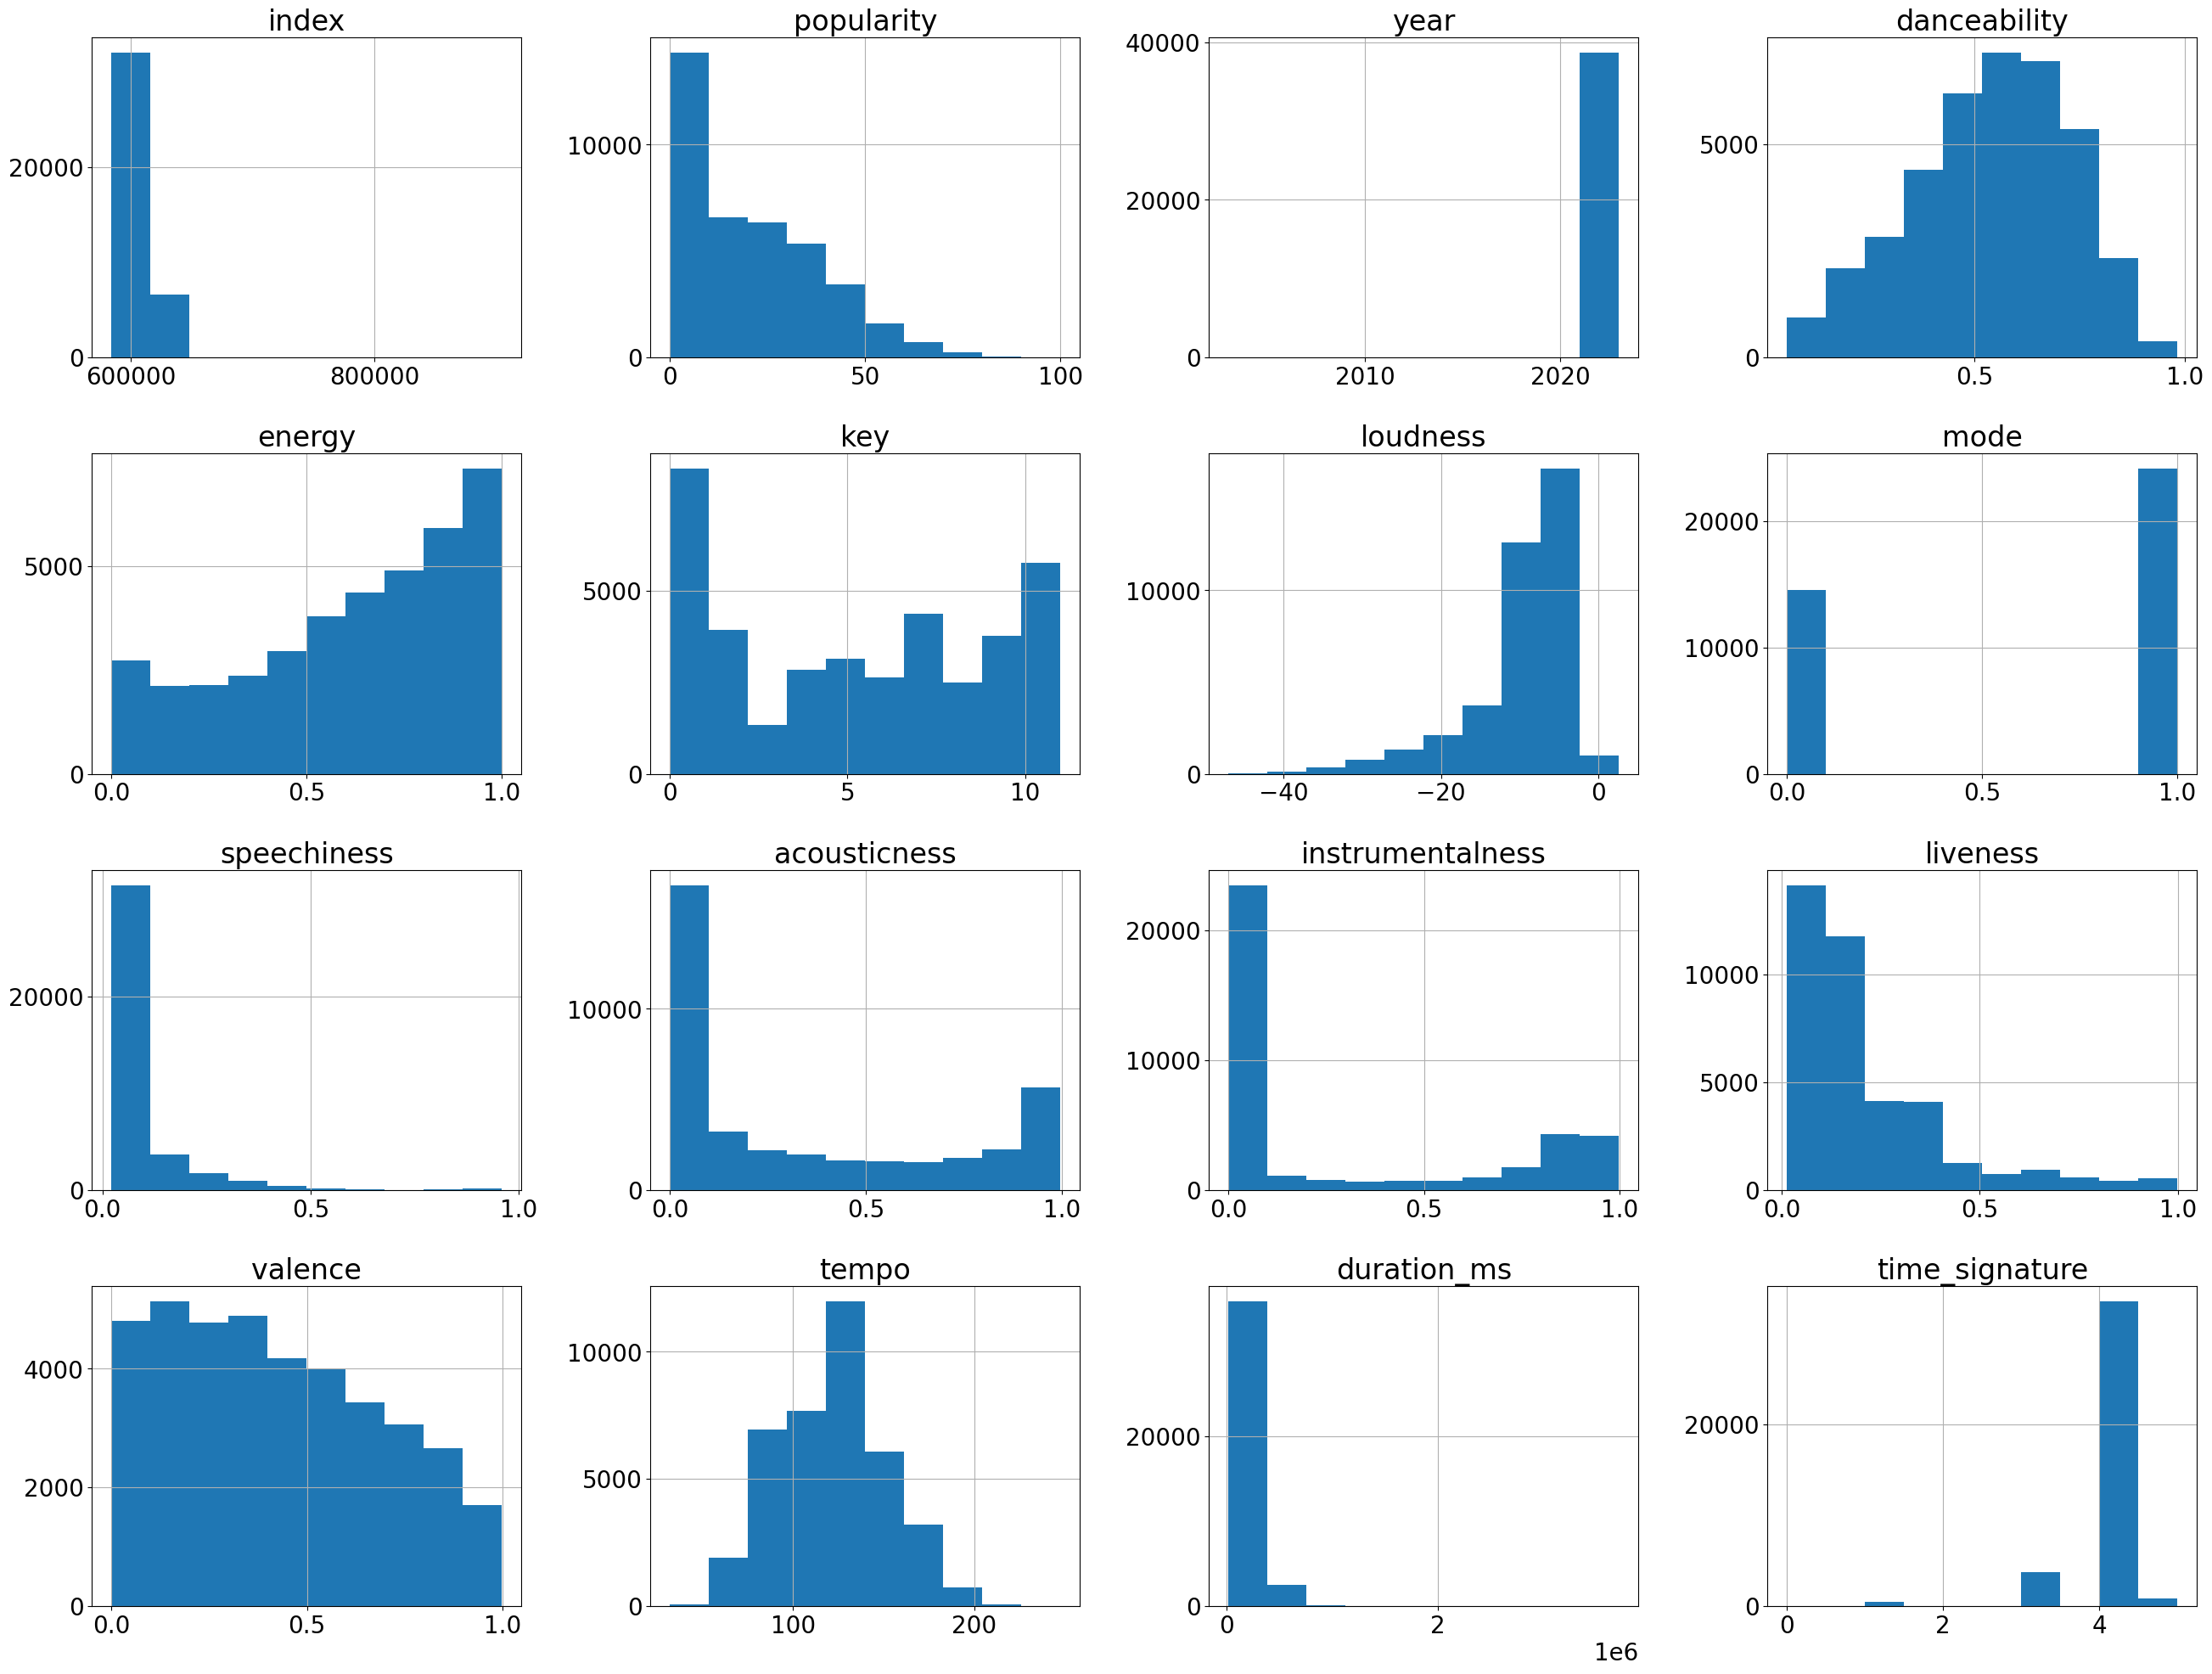

In [481]:
songs.hist(figsize=(32, 24))
plt.rcParams.update({'font.size': 40})
plt.show()

## 3.2 Correlation matrix

In [482]:
corr_matrix = songs.corr(numeric_only=True)

# examine feature correlations with target
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
loudness            0.208706
danceability        0.145841
energy              0.143974
tempo               0.074819
time_signature      0.041627
speechiness         0.028817
key                 0.003128
valence             0.002080
year               -0.002576
liveness           -0.008624
mode               -0.046983
index              -0.057875
duration_ms        -0.104051
instrumentalness   -0.150776
acousticness       -0.174230
Name: popularity, dtype: float64

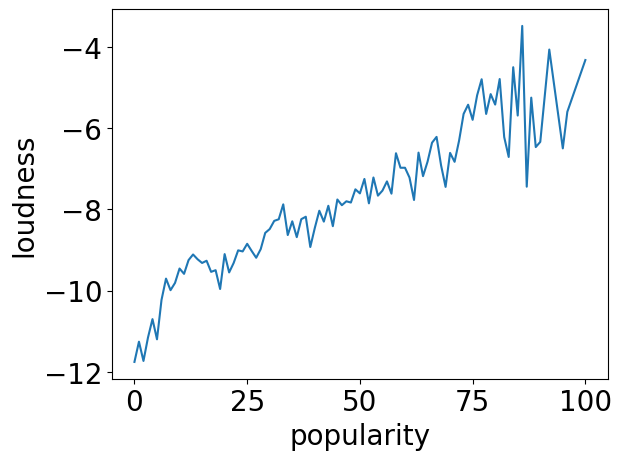

In [483]:
plt.rcParams.update({'font.size': 20})
pop_vs_loud = sns.lineplot(x="popularity", y="loudness", data=songs, errorbar=None)

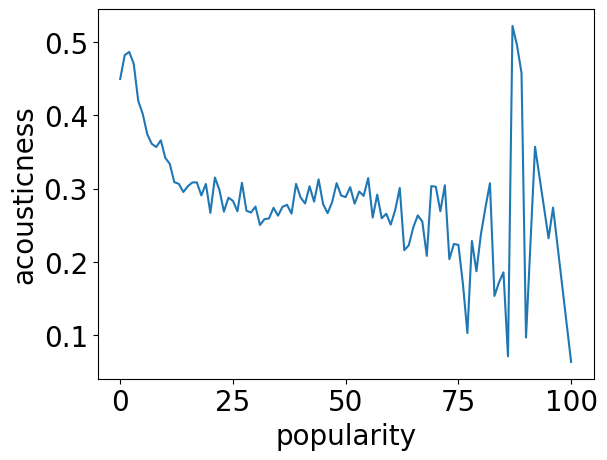

In [484]:
pop_vs_acousticness = sns.lineplot(x="popularity", y="acousticness", data=songs, errorbar=None)

## 3.3 Look at structure of target (popularity)

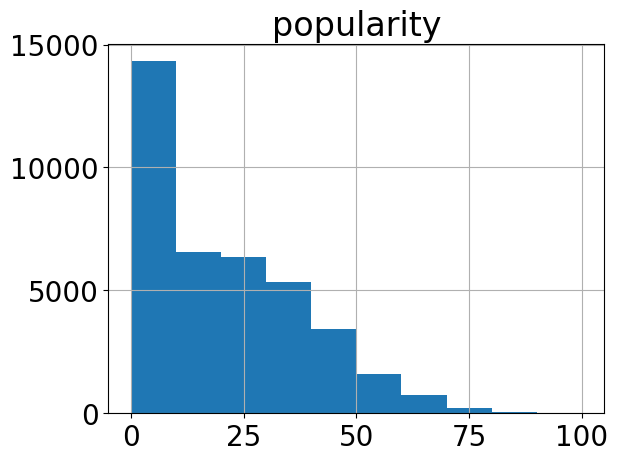

In [485]:
songs.hist(column="popularity", bins=10)
plt.show()

## 3.4 Look at structure of artist_name and genre

In [486]:
count_by_artist = songs["artist_name"].value_counts()
print(count_by_artist)


artist_name
Wolfgang Amadeus Mozart    377
Zarobi                     257
Shakuhachi Sakano          197
Ludwig van Beethoven       149
Johann Sebastian Bach      139
                          ... 
Doctor P                     1
STUCA                        1
Nitepunk                     1
Supereffective               1
Barış Manço                  1
Name: count, Length: 11048, dtype: int64


<Axes: xlabel='artist_name'>

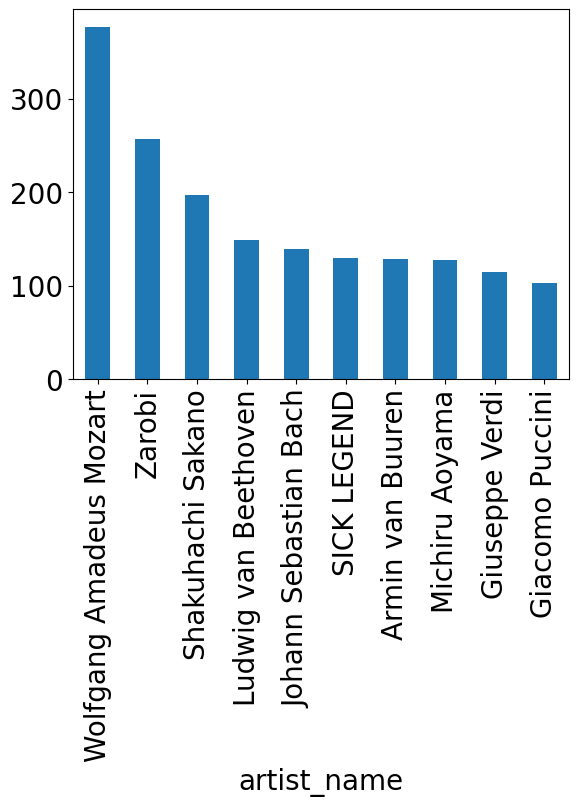

In [487]:
top10_artists = count_by_artist[:10]
top10_artists.plot(kind='bar')

In [488]:
count_by_genre = songs["genre"].value_counts()
print(count_by_genre)

genre
black-metal       889
gospel            845
forro             836
emo               824
indian            814
                 ... 
grindcore          62
chicago-house      52
show-tunes         50
detroit-techno     43
romance            16
Name: count, Length: 81, dtype: int64


<Axes: xlabel='genre'>

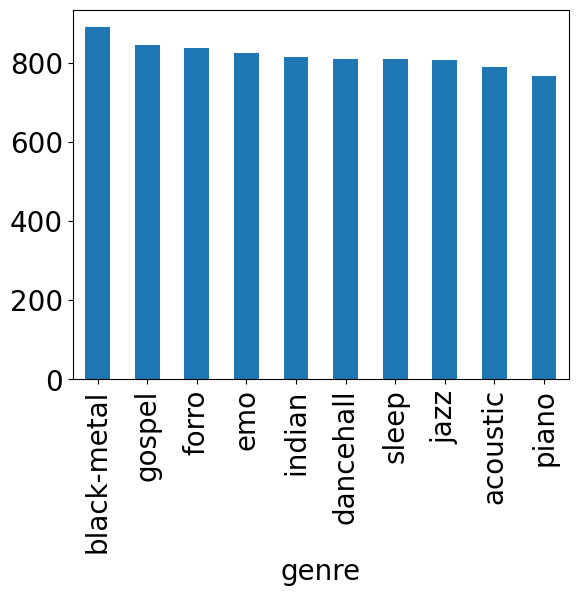

In [489]:
top10_genre = count_by_genre[:10]
top10_genre.plot(kind='bar')

# 4 - Preprocessing

## 4.1 Drop ID columns

There are several columns in the dataset that are unique to each example/track (index, track_name, track_id). These need to be removed so that the models do not accidentally train on them (i.e., overfit). In addition, the year column is the same for examples (year = 2023) so it can be removed, too.

Lastly, the artist_name column contains >11,000 unique values (see 3.4) which breaks the one-hot encoder. To avoid this issue, we drop this feature as well.

In [490]:
songs = songs.drop(["index", "track_name", "track_id", "year"], axis=1)

# TODO: The artist_name has too many unique values for the one-hot encoder. Drop it for now
songs = songs.drop(['artist_name'], axis=1)

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38650 entries, 0 to 38649
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        38650 non-null  int64  
 1   genre             38650 non-null  object 
 2   danceability      38650 non-null  float64
 3   energy            38650 non-null  float64
 4   key               38650 non-null  int64  
 5   loudness          38650 non-null  float64
 6   mode              38650 non-null  int64  
 7   speechiness       38650 non-null  float64
 8   acousticness      38650 non-null  float64
 9   instrumentalness  38650 non-null  float64
 10  liveness          38650 non-null  float64
 11  valence           38650 non-null  float64
 12  tempo             38650 non-null  float64
 13  duration_ms       38650 non-null  int64  
 14  time_signature    38650 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 4.4+ MB


## 4.2 Check for missing values (Nan or '?')

In [491]:
songs = songs.replace('?', np.nan)
songs.isna().sum()

popularity          0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## 4.3 Discretize target into 4 bins

This creates a new feature (popularity_bins) which will be used later to resample the training data.

In [492]:
songs["popularity_bins"] = pd.cut(
    x = songs["popularity"],
    # bins = [-1, 20, 40, 60, 100],
    # labels = ["<=20", "21-40", "41-60", ">60"]
    bins = [-1, 30, 70, 100],
    labels = ["low", "med", "high"]
)
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38650 entries, 0 to 38649
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        38650 non-null  int64   
 1   genre             38650 non-null  object  
 2   danceability      38650 non-null  float64 
 3   energy            38650 non-null  float64 
 4   key               38650 non-null  int64   
 5   loudness          38650 non-null  float64 
 6   mode              38650 non-null  int64   
 7   speechiness       38650 non-null  float64 
 8   acousticness      38650 non-null  float64 
 9   instrumentalness  38650 non-null  float64 
 10  liveness          38650 non-null  float64 
 11  valence           38650 non-null  float64 
 12  tempo             38650 non-null  float64 
 13  duration_ms       38650 non-null  int64   
 14  time_signature    38650 non-null  int64   
 15  popularity_bins   38650 non-null  category
dtypes: category(1), float6

In [493]:
songs["popularity_bins"].value_counts()

popularity_bins
low     27844
med     10562
high      244
Name: count, dtype: int64

## 4.4 Split test and training datasets

In [494]:
from sklearn.model_selection import train_test_split

songs_train, songs_test = train_test_split(songs, test_size=0.2, random_state=42)

## 4.5 Resample

The goal is to mitigate the skew in the distribution of the target. That is, we want the model to be able to predict popularity for popular songs (>60 popularity) which are considerably underrepresented in the original dataset. The strategy is twofold:
- Undersample the less popular songs
- Oversample (i.e., duplicate examples of) the more popular songs

To do this, we used the popularity_bins feature created in step 4.3 and ensure that each bin has the same number of samples (2000). As can be seen in the value counts shown in 4.3, this will result in the desired undersampling of the three (3) less popular bins and oversampling for the last more popular bin.

In [495]:
from sklearn.utils import resample
songs_low = songs_train[songs_train["popularity_bins"]=="low"]
songs_med= songs_train[songs_train["popularity_bins"]=="med"]
songs_high = songs_train[songs_train["popularity_bins"]=="high"]
n_samples_maj = 3000
n_samples_min = 1000
RN = 42


songs_low_down = resample(
    songs_low,
    n_samples = n_samples_maj,
    replace = False,
    random_state = RN
)
songs_med_down = resample(
    songs_med,
    n_samples = n_samples_maj,
    replace = False,
    random_state = RN
)
songs_high_up = resample(
    songs_high,
    n_samples = n_samples_min,
    replace = True,
    random_state = RN
)
songs_resample = pd.concat([songs_low_down, songs_med_down, songs_high_up])

# code adapted from user n1k31t4 on the Data Science Stack Exchange
# https://datascience.stackexchange.com/a/33149

# n_per_group = 3000
# songs_resample = songs_train.groupby("popularity_bins", group_keys=False, observed=False).apply(
#     lambda x: x.sample(n_per_group, replace=True)
# )


In [496]:
songs_resample["popularity_bins"].value_counts()

popularity_bins
low     3000
med     3000
high    1000
Name: count, dtype: int64

In [497]:
songs_train = songs_resample.drop(["popularity_bins"], axis=1)

# songs_train = songs_train.drop(["popularity_bins"], axis=1)
songs_test = songs_test.drop(["popularity_bins"], axis=1)

## 4.6 Split features (X) and target (y)

In [498]:
X_train = songs_train.drop(["popularity"], axis=1)
y_train = songs_train["popularity"]

X_test = songs_test.drop(["popularity"], axis=1)
y_test = songs_test["popularity"]

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7730 entries, 35901 to 12946
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             7730 non-null   object 
 1   danceability      7730 non-null   float64
 2   energy            7730 non-null   float64
 3   key               7730 non-null   int64  
 4   loudness          7730 non-null   float64
 5   mode              7730 non-null   int64  
 6   speechiness       7730 non-null   float64
 7   acousticness      7730 non-null   float64
 8   instrumentalness  7730 non-null   float64
 9   liveness          7730 non-null   float64
 10  valence           7730 non-null   float64
 11  tempo             7730 non-null   float64
 12  duration_ms       7730 non-null   int64  
 13  time_signature    7730 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 905.9+ KB


## 4.7 Preprocessing pipeline

Since our dataset does not have missing values, several preprocessing steps are not strictly necessary. However, we include them here for completeness. The major concern here is to complete the one-hot encoding for the categorical data (artist_name, genre).

In [499]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create two column lists: 1 for numerical features, 1 for categorical features 
num_cols = X_train.select_dtypes(include='number').columns.to_list()
cat_cols = X_train.select_dtypes(exclude='number').columns.to_list()

# Create separate pipelines for numeric and categorical features
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False, handle_unknown='error'))

preprocessing = ColumnTransformer(
    [('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough'
)

# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['danceability', 'energy', 'key', 'loudness',
                                  'mode', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'duration_ms', 'time_signature']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['genre'])])

In [500]:
# Train the pipeline
preprocessing.fit(X_train)

# Apply the pipeline
X_train_prep = preprocessing.transform(X_train)
X_test_prep = preprocessing.transform(X_test)

# Convert back to pd.DataFrame
feature_names = preprocessing.get_feature_names_out()
X_train_prep = pd.DataFrame(data=X_train_prep, columns=feature_names)
X_test_prep = pd.DataFrame(data=X_test_prep, columns=feature_names)

# print(X_prepared.shape)

# 5 - Feature Selection

TODO. Maybe

In [501]:
from sklearn.feature_selection import SelectKBest, f_regression
k_feat = 50
selector = SelectKBest(score_func=f_regression, k=k_feat)
selector.fit(X_train_prep, y_train)
X_train_low_dim = selector.transform(X_train_prep)
X_test_low_dim = selector.transform(X_test_prep)

# 6 - Model Selection

We train three regression models (linear regression, SVM, other) and evaluated their performance

## 6.1 Linear Regression

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

lr_model = LinearRegression()
lr_model.fit(X_train_prep,y_train)
lr_y_predict = lr_model.predict(X_test_prep)
# lr_model.fit(X_train_low_dim,y_train)
# lr_y_predict = lr_model.predict(X_test_low_dim)
lr_mse=mse(y_test, lr_y_predict)
lr_mse

292.99483665818536

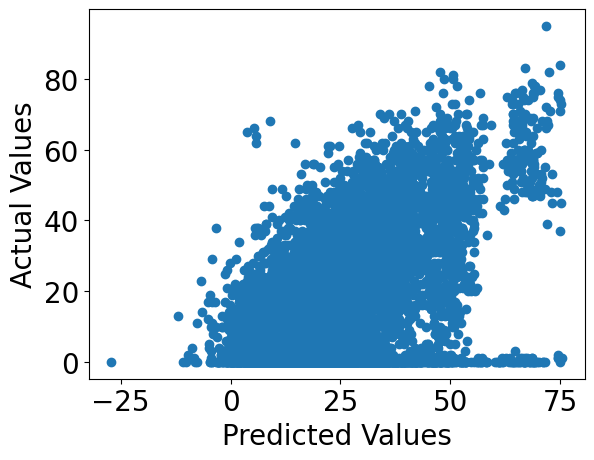

In [503]:
plt.scatter(lr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## 6.2 Support Vector Regression (SVR)

In [504]:
from sklearn.svm import SVR

svr_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# svr_model.fit(X_train_prep,y_train)
# svr_y_predict = svr_model.predict(X_test_prep)
svr_model.fit(X_train_low_dim,y_train)
svr_y_predict = svr_model.predict(X_test_low_dim)
svr_mse=mse(y_test, svr_y_predict)
svr_mse

326.54297714102734

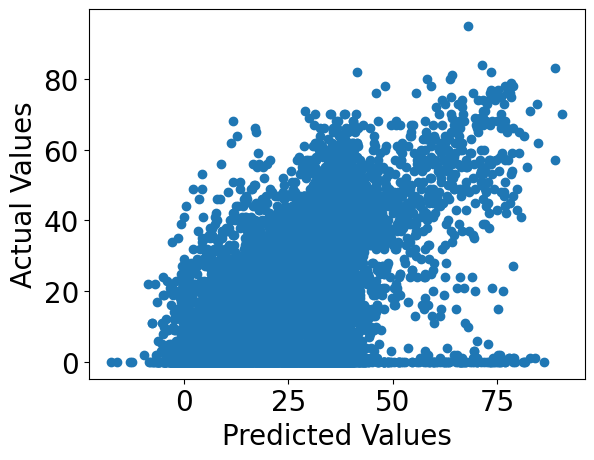

In [505]:
plt.scatter(svr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()